# Labor zu Verteilungen und Inferenz

Literatur: 
- QQ-Plot: Fahrmeir, Statistik: Der Weg zur Datenanalyse, Kapitel 2.4.2
- mathematischer: Grundlagen der Statistik Kapitel 2.4, Fahrmeir et al., Arens et al. etc.
- mehr beschreibend: Bruce et al. Praktische Statistik für Data Scientists, Auszüge aus Kapitel 2 (QQ-Plot und Verteilungen) und 3 (bis Seite 116)
- Nachschlagewerk für statistische Methoden: Hedderich, Sachs: Angewandte Statistik, Kapitel 7
- Python-Dokumentationen

Sie werden hier:
- Messdaten zweier Gruppen aufnehmen und statistisch analysieren, ob die Gruppen zur gleichen Grundgesamtheit gehören
- Messdaten anhand verschiedener Methoden auf Art der Verteilung prüfen: Histogramm, Wahrscheinlichkeitsnetz/QQ-Plot, statistischer Test
- Lagemaß von zwei Stichproben vergleichen unter Annahme verschiedener Voraussetzungen: t-Test, Mann-Whitney-U-Test, Permutationstest

Lernziele:
- verschiedene Methoden zur Prüfung der Verteilung der Daten anwenden und interpretieren können
- verschiedene Methoden zum Vergleich des Lagemaßes von Daten kennen und Ergebnisse interpretieren können
- Nullhypothese und Alternativhypothese formulieren können
- p-Wert interpretieren können

Output:
- siehe moodle

In [2]:
# Nötige Module importieren
# Daten einlesen, speichern und bearbeiten
import pandas as pd

# Plotten
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()  # alle Plots (auch von matplotlib) im seaborn-Style

# Numerische und statistisches Operationen
import numpy as np
from scipy import stats
from sklearn.utils import resample
import statsmodels.api as sm

## 1. Daten auf Verteilung prüfen

Statistische Methoden weisen meist Voraussetzungen auf, die erfüllt sein müssen, damit die Ergebnisse der Tests gültig sind. Eine wichtige Voraussetzung ist oft die Verteilung der Daten. Meist werden mehrere Tools genutzt, um zu prüfen, ob Daten einer bestimmten Verteilung (häufig der Normalverteilung) folgen.
1. Überlegung: welche Gründe gibt es für eine bestimmte Verteilung der Daten? (z.B. zentraler Grenzwertsatz -> Normalverteilung, seltene, unabhängige Ereignisse -> Poissonverteilung etc. Hier sollte Wissen über die Datenerhebung einfließen. Dabei ist häufig der Input eines Statistikers notwendig!)
2. Grafische Prüfung und evtl. statistischer Test, um zu sehen, ob die Daten der überlegten Verteilung folgen könnten



In [3]:
#TODO Daten einlesen und überprüfen
data = pd.read_csv("./Bueroklammern.csv",delimiter=";")
data.head()
data_verzinkt = data.verzinkt
data = data.rot


### 1.1 Grafische Prüfung auf Normalverteilung

Zur grafischen Prüfung auf Verteilungen wird meist eine Kombination verschiedener statistischer Plots verwendet: Histogramm, empirische Verteilungsfunktion und Quantil-Quantil-Plot (QQ-Plot).
- Histogramm: Das Histogramm zeigt die Verteilung der Daten. Auch wenn ein Histogramm auf den ersten Blick relativ einfach zu interpretieren scheint, ist es in dieser Darstellung recht schwierig einzuschätzen, ob Daten einer bestimmten Verteilung folgen. 
- empirische Verteilungsfunktion: Eine andere Möglichkeit der Darstellung ist die (empirische) Verteilungsfunktion. Diese zeigt die relative Häufigkeit, mit der ein Wert unterschritten wird, die grafische Interpretation ist allerdings nicht so intuitiv. 
- QQ-Plot: Eine gute Möglichkeit ist die Visualisierung in einem Quantil - Quantil Plot. Im QQ-Plot werden die Quantile der Daten gegen die Quantile der Referenzverteilung aufgetragen. Damit ergibt sich bei gleicher Verteilung ein linearer Verlauf, der die grafische Beurteilung sehr erleichtert. Bei einem Normal - Quantil Plot zeigt die Steigung der Linie die Standardabweichung und der Schnittpunkt mit der y-Achse den Mittelwert der Daten.
- Alternativ zu QQ-Plots können auch (die weniger verbreiteten) PP-Plots (Probability-Probability-Plots) verwendet werden, die die Wahrscheinlichkeiten der Daten gegen die Wahrscheinlichkeiten der Referenzverteilung auftragen. Der PP-Plot ist weniger sensitiv zu Veränderungen in den Rändern der Verteilung als der QQ-Plot.

Unten sehen Sie die drei Darstellungen für den Vergleich der Daten mit einer Normalverteilung. 
Testen Sie mit den Messdaten und mit zufälligen Daten, die Sie aus einer Normalverteilung ziehen. Sie können auch mit anderen Verteilungen spielen.

c:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


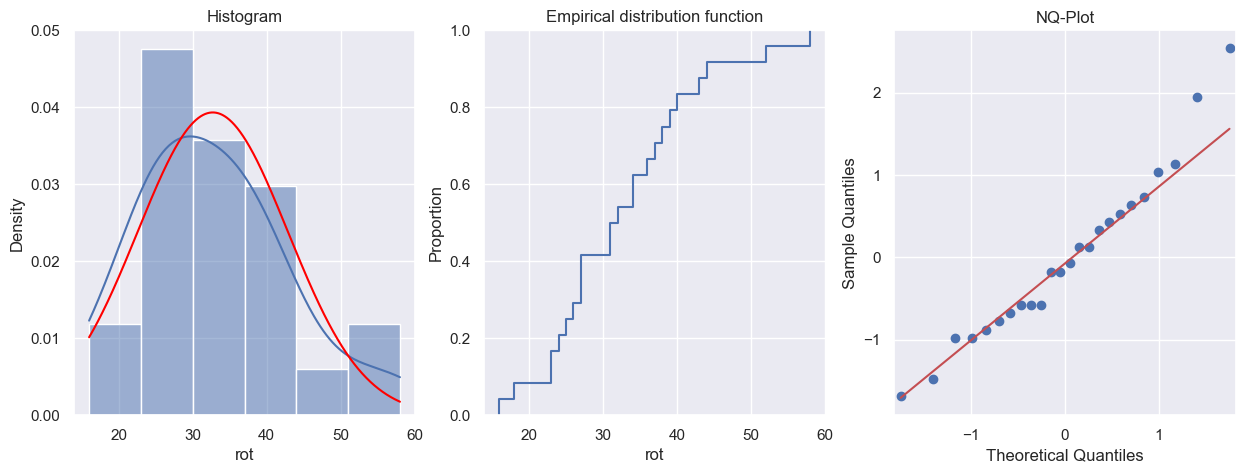

In [4]:
# Grafische Prüfung auf Normalverteilung
x = np.linspace(min(data),max(data), 1000)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data, kde=True, stat='density', ax=axs[0])
axs[0].plot(x, stats.norm.pdf(x, loc=data.mean(), scale=data.std()),
            color='red')  # Normalverteilung mit Mittelwert und Standardabweichung der Stichprobe, Dichte ist normiert auf 1
sns.ecdfplot(data, ax=axs[1])
sm.qqplot(data, dist=stats.norm, fit=True, line='q', ax=axs[2]) # Auftragung der Quantile der Stichprobe gegen die Quantile der Standardnormalverteilung, wenn die Daten normalverteilt sind, liegen die Punkte auf der roten Linie

axs[0].set_title('Histogram')
axs[1].set_title('Empirical distribution function')
axs[2].set_title('NQ-Plot')

plt.show()

### 1.2 Statistischer Test auf Normalverteilung

Statistische Tests in scipy: https://docs.scipy.org/doc/scipy/reference/stats.html

Statistischer Test zur Prüfung auf Normalverteilung: Anderson-Darling-Test oder Shapiro-Wilk-Test

Schauen Sie in die Dokumentation: 
- Was ist die Nullhypothese? 
    - Shapiro: Werte sind normalverteilt
    - anderson: Werte sind normalverteilt
- Was ist damit der alpha-Fehler (Fehler 1. Art), was ist der beta-Fehler (2. Art)?
    - Shapiro: alpha --> Ist Normalverteil aber wird abgelehnt; beta --> Ist nich normalverteilt wird jedoch behalten
    - anderson: siehe Shapiro
- Welcher p-Wert gehört zu einem positiven Testergebnis (Nullhypothese ablehnen) bzw. zu einem negativen Testergebnis (Nullhypothese beibehalten)?
    - Shapiro: kleiner p-Wert = "Beweis" gegen die Nullhypothese
- Welche Risiken gibt es somit bei der Anwendung des Tests?
    - shapiro: beta Fehler wiegt schwerer, es kann nicht bewiesen werden das eine Normalverteilung vorliegt

In [5]:
stats.shapiro(data)
#stats.anderson(data)

ShapiroResult(statistic=0.9632190465927124, pvalue=0.5064225196838379)

### 1.3 Methodenvergleich

Sammeln Sie Vor- und Nachteile der verschiedenen Methoden und überlegen Sie, wann welche Methode geeigneter ist.

## 2. Lagemaß zweier Stichproben anhand verschiedener Tests vergleichen

Nun wollen wir wissen, ob die beiden Boxen mit Büroklammern sich bzgl. ihrer Lebensdauer statistisch signifikant unterscheiden. Statistische Tests weisen unterschiedliche Voraussetzungen auf, die erfüllt sein müssen, damit die Ergebnisse der Tests gültig sind. Hier führen Sie nun verschiedene Tests durch und schauen, wie sich die Ergebnisse unterscheiden. Vermutlich sind nicht alle Voraussetzungen der vorgegebenen Tests erfüllt. Ist das in den Ergebnissen erkennbar?

### 2.1 Graphischer Vergleich des Lagemaßes
Bevor Sie den Test durchführen, schauen Sie sich die Daten im Vergleich graphisch an. Hierfür eignet sich ein gruppierter Boxplot mit Notch (Konfidenzintervall für den Median). Der Boxplot gibt auch direkt einen Eindruck, ob Voraussetzungen wie Nomalverteilung, gleiche Verteilungen, gleiche Varianz etc. überhaupt erfüllt sein könnten.

24
24


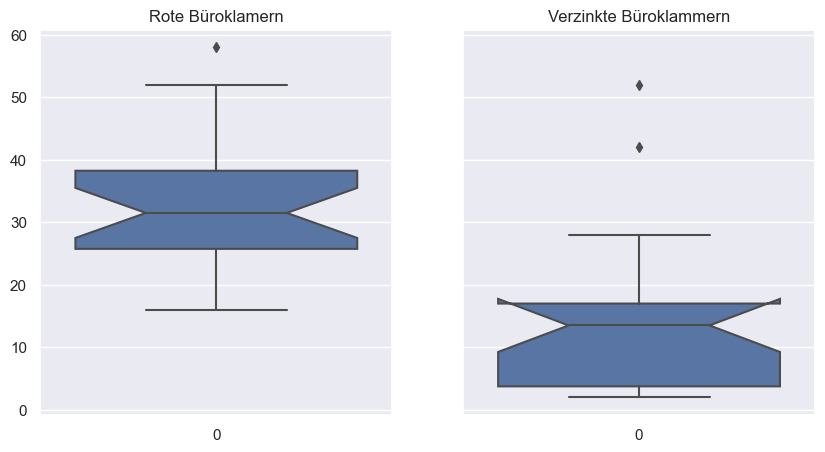

In [8]:
#TODO: Visulisieren Sie die Daten in jeweils einem Boxplot mit Notch (Konfidenzintervall für den Median)
fig,axs = plt.subplots(1,2,figsize=(10,5),sharex=True,sharey=True)
sns.boxplot(data=data, notch=True, ax=axs[0]).set_title("Rote Büroklamern")
sns.boxplot(data=data_verzinkt, notch=True,ax=axs[1]).set_title("Verzinkte Büroklammern")
print(np.size(data))
print(np.size(data_verzinkt))
plt.show()


### 2.2 t-Test
Der am weitesten verbreitete Test zur Überprüfung, ob zwei Stichproben aus der gleichen Grundgesamtheit stammen, ist der t-Test. Der t-Test prüft, ob die Mittelwerte zweier Stichproben signifikant voneinander abweichen. Der t-Test setzt voraus, dass die Daten normalverteilt sind und die Varianzen der beiden Stichproben gleich sind.

In [107]:
#TODO: Durchführen eines t-Tests
s = np.sqrt(((np.size(data) - 1) * data.std()**2 + (np.size(data_verzinkt) - 1) * data_verzinkt.std()**2) / (np.size(data) + np.size(data_verzinkt) - 2))
zaehler = np.mean(data) - np.mean(data_verzinkt)
nenner = s * np.sqrt((1 / np.size(data)) + (1 / np.size(data_verzinkt)))
t_value = zaehler / nenner
print(t_value)

t_krit = stats.t.ppf(1-0.05 / 2, 46)
print(t_krit)
stats.ttest_ind(data,data_verzinkt)


0.08315146099413014
2.0128955952945886


TtestResult(statistic=0.08313154205478511, pvalue=0.9337549219041917, df=2086.0)

### 2.3 Mann-Whitney-U-Test
Alternativ zum t-Test kann bei nicht normalverteilten Daten der Mann-Whitney-U-Test durchgeführt werden. Der Mann-Whitney-U-Test ist ein Rangsummentest und überprüft, ob es gleich wahrscheinlich ist, dass ein zufällig aus der einen Population gewählter Wert größer oder kleiner ist als ein zufällig aus der anderen Population gewählter wird. Der Test setzt voraus, dass die Verteilungen der beiden Stichproben gleich sind.

In [15]:
#TODO: Durchführen eines Mann-Whitney-U-Tests
stats.mannwhitneyu(data,data_verzinkt)


MannwhitneyuResult(statistic=514.0, pvalue=3.245145833477427e-06)

### 2.4 Permuationstest

Alternativ kann simulationsbasiert vorgegangen werden und ein Permutationstest durchgeführt werden. Hierfür gibt es keine Voraussetzung an die Verteilung der Daten. Die Nullhypothese wird dadurch getestet, dass die Daten alle in einen Topf geworfen werden und immer wieder neu aufgeteilt werden. Wenn der Unterschied der Mittelwerte in den Daten statistisch signifikant größer ist als der Unterschied der Mittelwerte der permutierten Gruppen, wird die Nullhypothese verworfen.

In [104]:
# TODO: Durchführen eines Permutationstests (vervollständigen Sie den Code / Passen Sie den Code an Ihre Benennung an)
n_permutations = 1000
observed_difference = np.mean(data) - np.mean(data_verzinkt)
n1 = len(data)
n2 = len(data_verzinkt)
data = np.concatenate([data, data_verzinkt])
differences = []
counter = 0
for _ in range(n_permutations):
    np.random.shuffle(data)
    new_difference = np.mean(data[:n1]) - np.mean(data[n1:])
    differences.append(new_difference)
# calculate the p-value
for value in differences:
    	if np.abs(value) >= observed_difference:
                counter += 1

p_value = counter/n_permutations
print("H0: no difference, ", "observed difference:", observed_difference, ", p-value:", p_value)

H0: no difference,  observed difference: 0.2122549019607849 , p-value: 0.941


### 2.4 Vergleich der Ergebnisse

Vergleichen Sie die Ergebnisse der verschiedenen Tests.
- Welcher Test zeigt größere statistische Signifikanz?
- Meist sind Tests mit strengeren Voraussetzungen mächtiger (d.h. Sie finden auch kleinere Unterschiede). Trifft das hier zu?
- Sind statistisch signifikante Ergebnisse auch wahr?
- Welcher Test ist hier geeignet?



In [ ]:
# - Der Mann-Whitney-U-Test zeigt die größte statistische Signifikanz mit einem p Wert von 
# 3.245 x10^-6. Die  H0 kann sicher abgelehnt werden und deutet auf einen signifikanten Unterschied 
# zwischen den Gruppen hin.